<a href="https://colab.research.google.com/github/athulskrish/athulskrish-machinelearning_model_exam/blob/main/MI_model_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Random forest
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

diabetes=pd.read_csv('/content/drive/MyDrive/datasets/diabetes.csv')

X=diabetes.drop('Outcome',axis=1)
y=diabetes['Outcome']

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=66)
rfc=RandomForestClassifier(n_estimators=100,random_state=66)

rfc.fit(X_train,y_train)

train_accuracy=rfc.score(X_train,y_train)
test_accuracy=rfc.score(X_test,y_test)
print("training ", train_accuracy)
print("Testing ",test_accuracy)

training  1.0
Testing  0.7760416666666666


In [ ]:
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

# load the dataset
url = '/content/drive/MyDrive/datasets/diabetes.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
X, y = data[1:, :-1], data[1:, -1]

# define model
model = Lasso(alpha=1.0)

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

# fit model
model.fit(X, y)

# define new data
row = [1, 189, 60, 23, 846, 30.1, 0.398, 59]

# make a prediction
yhat = model.predict([row])

# summarize prediction
print("Predicted: %.0f" % (yhat[0]))  # Use indexing to extract the first element



Mean MAE: 0.374 (0.022)
Predicted: 1


In [ ]:
#lasso regression
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso




Mean squared error  0.12785817711928915
slope :  [1.02474643]
intercept :  -0.21354150071690547


Text(0, 0.5, 'salary')

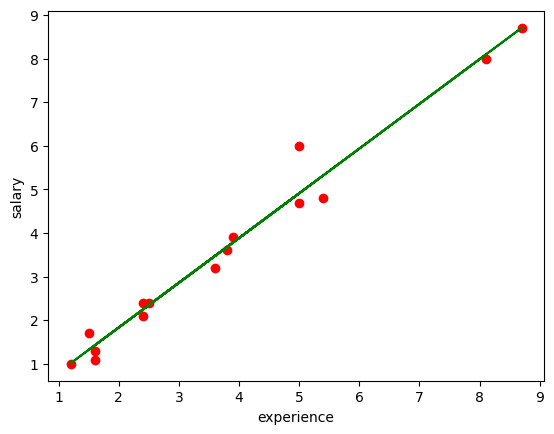

In [ ]:
#linear regression


import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error


experience= np.array([2.4,5.0,1.5,3.8,8.7,3.6,1.2,8.1,2.5,5,1.6,1.6,2.4,3.9,5.4])
salary = np.array([2.1,4.7,1.7,3.6,8.7,3.2,1.0,8.0,2.4,6,1.1,1.3,2.4,3.9,4.8])

experience=experience.reshape(-1,1)
model=LinearRegression()
model.fit(experience, salary)

salary_predict= model.predict(experience)
MSE=mean_squared_error(salary, salary_predict)

print("Mean squared error ", MSE)

print('slope : ', model.coef_)

print('intercept : ', model.intercept_)


import matplotlib.pyplot as plt
plt.scatter(experience,salary,color = 'red')
plt.plot(experience,salary_predict, color = 'green')
plt.xlabel("experience")
plt.ylabel("salary")


In [ ]:

import graphlib

from collections import deque
class Graph:
    def __init__(self,adjac_lis):

        self.adjac_lis=adjac_lis
    def get_neighbors(self,v):
        return self.adjac_lis[v]
    def h(self,n):

        H={'A' :1,'B' :1,'C' :1,'D' :1}
        return H[n]
    def a_star_algorithm(self,start,stop):

        open_lst=set([start])
        closed_lst=set([])
        g={}
        g[start]=0
        par={}
        par[start]=start
        while len(open_lst)>0:
                n=None
                for v in open_lst:
                     if n==None or g[v]+self.h(v)<g[n]+self.h(n):
                         n=v;
                if n==None:
                    print('Path does not exist!')
                    return None
                if n==stop:
                    reconst_path=[]
                    while par[n]!=n:
                        reconst_path.append(n)
                        n=par[n]
                    reconst_path.append(start)
                    reconst_path.reverse()
                    print('path found :{}'.format(reconst_path))
                    return reconst_path
                for (m,weight)in self.get_neighbors(n):
                    if m not in open_lst and m not in closed_lst:
                        open_lst.add(m)
                        par[m]=n
                        g[m]=g[n]+weight
                    else:
                        if g[m]>g[n]+weight:
                            g[m]=g[n]+weight
                            par[m]=n
                            if m in closed_lst:
                                closed_lst.remove(m)
                                open_lst.add(m)
                open_lst.remove(n)
                closed_lst.add(n)
        print('Path does not exist!')
        return None
adjac_lis={'A':[('B',1),('C', 3), ('D', 7)],
            'B': [('D', 5)], 'C': [('D', 12)]}
graph1 = Graph(adjac_lis)
graph1.a_star_algorithm('A', 'D')







path found :['A', 'B', 'D']


['A', 'B', 'D']

In [ ]:
import random
from graphviz import Graph

def generate_random_graph(num_nodes, num_edges):
    # Create a new Graphviz graph
    g = Graph()

    # Add nodes to the graph
    for i in range(num_nodes):
        g.node(str(i))

    # Add random edges to the graph
    edges = set()  # To avoid duplicate edges
    while len(edges) < num_edges:
        src = random.randint(0, num_nodes - 1)
        dst = random.randint(0, num_nodes - 1)
        if src != dst:  # Avoid self-loops
            edges.add((src, dst))

    for src, dst in edges:
        g.edge(str(src), str(dst))

    return g

# Define the number of nodes and edges in the random graph
num_nodes = 5
num_edges = 7

# Generate the random graph
random_graph = generate_random_graph(num_nodes, num_edges)

# Render and display the graph
random_graph.render("random_graph", format="png", cleanup=True)
random_graph.view()


'random_graph.pdf'

In [ ]:
#a star
class Graph:
    def __init__(self, adjac_lis):
        self.adjac_lis = adjac_lis

    def get_neighbors(self, v):
        return self.adjac_lis[v]

    def H(self, n):
        h = {'A': 1, 'B': 1, 'C': 1, 'D': 1}
        return h[n]

    def a_star_algorithm(self, start, stop):
        open_lst = set([start])
        closed_lst = set([start])
        g = {start: 0}
        par = {start: start}

        while len(open_lst) > 0:
            n = None
            for v in open_lst:
                if n is None or g[v] + self.H(v) < g[n] + self.H(n):
                    n = v
            if n is None:
                print('path unavailable')
                return None
            if n == stop:
                reconst = []
                while par[n] != n:
                    reconst.append(n)
                    n = par[n]
                reconst.append(start)
                reconst.reverse()
                print('path found : {}'.format(reconst))
                return reconst

            for m, weight in self.get_neighbors(n):
                if m not in open_lst and m not in closed_lst:
                    open_lst.add(m)
                    par[m] = n
                    g[m] = g[n] + weight
                else:
                    if g[m] > g[n] + weight:
                        g[m] = g[n] + weight
                        par[m] = n
                        if m in closed_lst:
                            closed_lst.remove(m)
                            open_lst.add(m)
            open_lst.remove(n)
            closed_lst.add(n)
        print('path unavailable')
        return None


adjac_lis = {'A': [('B', 1), ('C', 3), ('D', 7)],
             'B': [('D', 5)], 'C': [('D', 12)]}
graph1 = Graph(adjac_lis)
graph1.a_star_algorithm('A', 'D')


path found : ['A', 'B', 'D']


['A', 'B', 'D']

In [ ]:
class Graph:
  def __init__(self,adjac_lis):
    self.adjac_lis= adjac_lis
  def get_neighbors(self,n):
    return self.adjac_lis[n]
  def H(self, n):
    h={'A':1,'B':1,'C':1, 'D':1}
    return h[n]

  def a_star_algorithm(self, start , stop):
    g={}
    g[start]=0
    open_lst = set([start])
    closed_lst = set([start])
    par={start : start}

    while len(open_lst)>0:
      n=None
      for v in open_lst:
        if n==None or g[v]+self.H(v)<g[n]+self.H[n]:
          n=v
        if n is None:
          print('path unavailable ')
          return None
        if n == stop:
          reconst=[]
          while par[n]!=n:
            reconst.append(n)
            n=par[n]
          reconst.append(start)
          reconst.reverse()
          print('Path found :{}'.format(reconst))
          return reconst

        for (m, weight) in self.get_neighbors(n):
          if m not in open_lst and m not in closed_lst:
            open_lst.add(m)
            par[m]=n
            g[m]=g[n]+weight
          else:
            if g[m]>g[n]+weight:
                g[m]=g[n]+weight
                par[m]=n
                if m in closed_lst:
                  closed_lst.remove(m)
                  open_lst.add(m)
      open_lst.remove(n)
      closed_lst.add(n)
    print("path noot found")
    return None
adjac_lis={'A':[('B',1),('C', 3), ('D', 7)],
              'B': [('D', 5)], 'C': [('D', 12)]}
graph = Graph(adjac_lis)
graph.a_star_algorithm('A', 'D')





RuntimeError: Set changed size during iteration

TypeError: 'method' object is not subscriptable